In [1]:
from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np

import pysynphot as S
print(S.__version__)

/home/mldantas/miniconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


0.9.8.6


In [2]:
%matplotlib inline

In [3]:
spectrum          = '/home/mldantas/Dropbox/DoutoradoIAG/Challenge/Sanity_Check/Specs/0443.51873.152_rebin.txt'
jplus_good_filter = '/home/mldantas/Dropbox/DoutoradoIAG/Challenge/Filters/JPLUS_SDSS_filters/rSDSS_2cols.txt'
jplus_bad_filter  = '/home/mldantas/Dropbox/DoutoradoIAG/Challenge/Filters/JPLUS_SDSS_filters/iSDSS_2cols.txt'

In [4]:
S.setref(area=4400)

In [5]:
sdss_spectrum = S.FileSpectrum(spectrum)
jplus_good_bandpass = S.FileBandpass(jplus_good_filter)
jplus_bad_bandpass = S.FileBandpass(jplus_bad_filter)

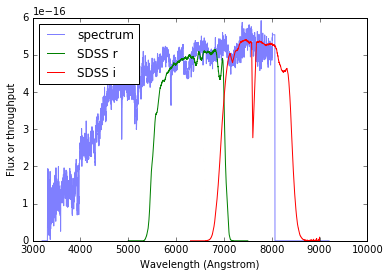

In [6]:
# For scaling of throughput so all would fit in same plot
fmax = sdss_spectrum.flux.max()

# Check bandpass coverage
plt.plot(sdss_spectrum.wave, sdss_spectrum.flux,
         label='spectrum', alpha=0.5, color='blue')
plt.plot(jplus_good_bandpass.wave, jplus_good_bandpass.throughput * fmax,
         label='SDSS r', color='green')
plt.plot(jplus_bad_bandpass.wave, jplus_bad_bandpass.throughput * fmax,
         label='SDSS i', color='red')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux or throughput')
plt.legend(loc='upper left')

In [7]:
binset = np.arange(3000, 11000)

In [8]:
photometry_good = S.Observation(
    sdss_spectrum, jplus_good_bandpass,
    binset=binset)  # extrap is unnecessary for this case
photometry_good_flam = photometry_good.effstim('flam')
lambda_eff_good = photometry_good.efflam()
print(photometry_good_flam, lambda_eff_good)

4.93492437612e-16 6333.9045939


In [9]:
photometry_bad = S.Observation(
    sdss_spectrum, jplus_bad_bandpass,
    binset=binset)  # extrap is unnecessary for this case
photometry_bad_flam = photometry_bad.effstim('flam')
lambda_eff_bad = photometry_bad.efflam()
print(photometry_bad_flam, lambda_eff_bad)

3.85719286331e-16 7516.30368089


In [10]:
i = np.where(sdss_spectrum.flux > 0)
sp2 = S.ArraySpectrum(
    wave=sdss_spectrum.wave[i], flux=sdss_spectrum.flux[i],
    waveunits=sdss_spectrum.waveunits,
    fluxunits=sdss_spectrum.fluxunits)
obs2 = S.Observation(
    sp2, jplus_bad_bandpass, binset=binset,
    force='extrap')  # extrap needed now
phot_obs2 = obs2.effstim('flam')
lamb_obs2 = obs2.efflam()
print(phot_obs2, lamb_obs2)

3.8571928694e-16 7516.30368248


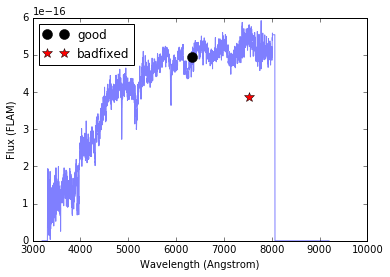

In [11]:
plt.plot(sdss_spectrum.wave, sdss_spectrum.flux, alpha=0.5)
plt.plot(lambda_eff_good, photometry_good_flam, 'o', color='black', markersize=10, label='good')
plt.plot(lamb_obs2, phot_obs2, '*', color='red', markersize=10, label='badfixed')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux (FLAM)')
plt.legend(loc='upper left')